**Tugas Praktikum**

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.

In [1]:
# Persiapan data
import pandas as pd # Library yang berguna dalam analisis data dan manipulasi data tabular
import numpy as np # Library untuk komputasi numerik, termasuk array multidimensional dan berbagai fungsi matematika
import matplotlib.pyplot as plt # Library yang digunakan untuk membuat grafik dan visualisasi data di Python
from sklearn.cluster import KMeans # Library yang digunakan dalam clustering

df = pd.read_csv('data/Mall_Customers.csv') # Membaca data dari file CSV dan menyimpannya dalam sebuah DataFrame

df.head() # Menampilkan 5 data teratas

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Seleksi Fitur

X = df.iloc[:, 2:-1] # digunakan untuk memilih baris dari semua barisdan kolom dari kolom ketiga hingga kolom sebelum terakhir sebagai variabel X
y = df.iloc[:, -1] # digunakan untuk mengambil kolom terakhir dari dataframe sebagai variabel target y

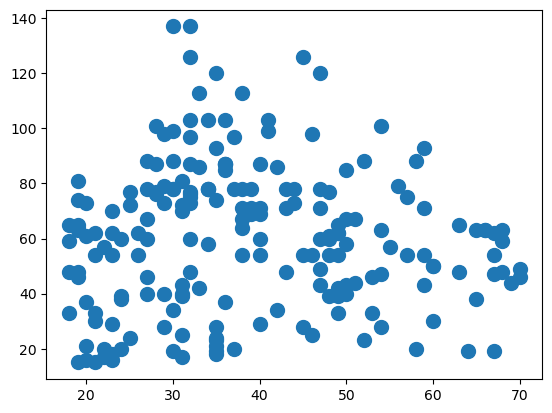

In [3]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

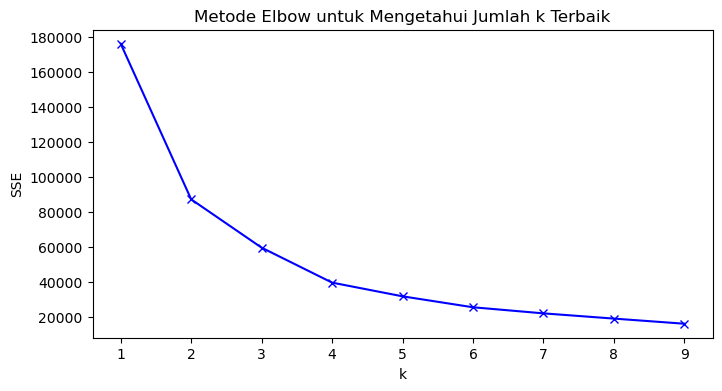

In [4]:
# Tentukan jumlah cluster (K) dengan Elbow Method
wcss = []
K = range(1,10)
for i in K:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8,4))
plt.plot(K, wcss, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [5]:
# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=5, n_init=10) # membuat sebuah objek KMeans dengan dua cluster

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X) # melatih model K-Means (cl_kmeans) pada data X dan memprediksi cluster ke mana setiap data akan termasuk

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


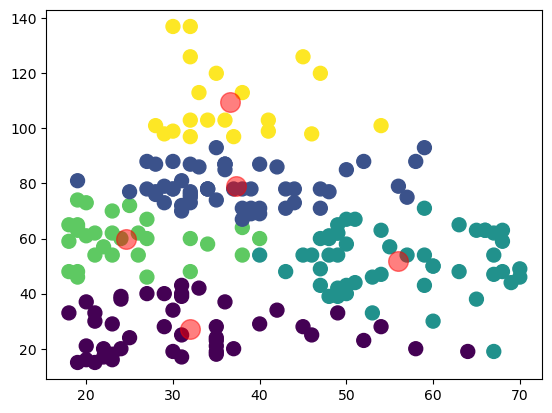

In [6]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans) # membuat scatter plot dari data yang dikelompokkan ke dalam cluster oleh algoritma K-Means

# Plot centroid
centers = cl_kmeans.cluster_centers_ # mengambil koordinat pusat dari masing-masing klaster setelah proses klastering selesai
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5) # menampilkan titik-titik pusat klaster dalam plot

4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [7]:
from minisom import MiniSom # kelas ini digunakan untuk membuat dan melatih jaringan SOM (Self-Organizing Map)
from skimage import io # Library yang umumnya digunakan untuk pemrosesan citra dan analisis gambar

# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)
    
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

c:\Users\ASUS\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [8]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
img_path = "data/pumpkin.jpeg"
img = io.imread(img_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [9]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(img, num_epochs, initial_learning_rate, initial_neighborhood_radius)

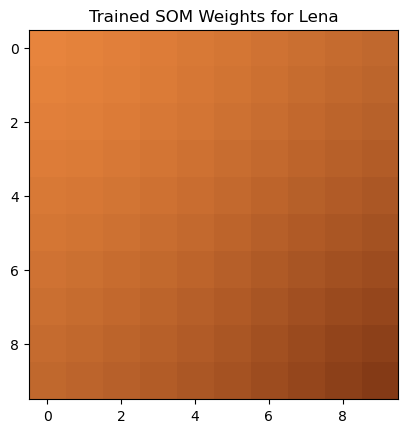

In [10]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()